## eta 原始 err 0.01

In [1]:
#import
import numpy as np
import matplotlib.pyplot as plt
#import NEATM
from NEATM2 import *
#constant
Fsun = 1367.5           # sun constant
sigma = 5.67E-8         #stefan-boltzmann constant
h = 6.626007015E-34     #plank constant
#q = 0.29+0.684*0.15    #phase integral = 0.29+0.684*G(=0.15)
epsi = 0.9             #radiance epsilon
kB = 1.38064852E-23     #boltzmann constant  j/k
cl = 299792458.0        #lightspeed m/s
au = 149597870700.0
pi = 3.1415926535
Rsun = 0.00465*au   #Rsun *m
Tsun = 5778         #Tsun  K
Hv = 22.2
G = 0.15
Ndd = 15
lamdai = [3.4,4.6,12,22]

### load epoch & cal epoch , define "x"

In [2]:
name = '2015TF'
#df = pd.read_table(f'ws.dat.{name}')
ast = np.loadtxt(f'./datepoch/ws.dat.{name}',skiprows=1,usecols=(5,6,7))
ear = np.loadtxt(f'./datepoch/ws.dat.{name}',skiprows=1,usecols=(8,9,10))
#ast-sun
d_N = np.sqrt(ast[:,0]**2+ast[:,1]**2+ast[:,2]**2)
#print('ast-sun',d_N)
#ast-earth
delta_N = np.sqrt((ast[:,0]-ear[:,0])**2+(ast[:,1]-ear[:,1])**2+(ast[:,2]-ear[:,2])**2)
#print('ast-earth',delta_N)
#earth-sun
dd_N = np.sqrt(ear[:,0]**2+ear[:,1]**2+ear[:,2]**2)
#print('earth-sun',dd_N)
#alpha
alpha_N = (delta_N*delta_N+d_N*d_N-dd_N*dd_N)/(2*delta_N*d_N)
alpha_N = np.arccos(alpha_N)
x = (delta_N,d_N,alpha_N)

### load obs data , define "y"

In [3]:
time = np.loadtxt(f'./datjd/mba.jd.{name}')
mjdtime = time-2400000.5
obsdat = np.loadtxt(f'./datwise/obsNEW.txt.{name}')
n4 = len(obsdat)//4
w1 = obsdat[:n4]
w2 = obsdat[n4:2*n4]
w3 = obsdat[2*n4:n4*3]
w4 = obsdat[n4*3:]
y = obsdat
len(y)

24

## load err data ,define yerr

array([4.36463849e-04, 4.59566410e-04, 4.11100759e-04, 2.19370798e-02,
       8.11237986e-04, 5.03904548e-04, 5.27394052e-02, 5.27010623e-02,
       4.70456949e-02, 4.73385262e-02, 5.04280148e-02, 5.32908194e-02,
       4.15015071e-01, 4.11976005e-01, 4.08832078e-01, 4.39213123e-01,
       4.37788016e-01, 4.34574129e-01, 8.79630099e-02, 1.17246552e-01,
       1.41091250e-01, 5.35464419e+00, 1.29747824e-01, 1.23680172e-01])

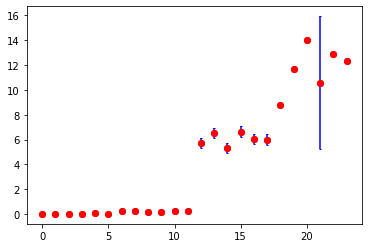

In [4]:
errdat = np.loadtxt(f'./daterr/obsNEWerr.txt.{name}')
erry = errdat[:]
plt.plot(y,'ro',label='obs')
plt.errorbar(range(0,n4*4,1),y, yerr=erry, fmt="o",ecolor='b',color='r', capsize=1.0)
erry


## model

In [5]:
def Model_neatm_Ref_jhx(theta,x,lamda):
    '''
    theta = (eta,D,wf)
    x = (astp,obsp)
    x = (3.4x;4.6x;12x;22x)
    '''
    eta,D,wf = theta
    astp,obsp = x
    lamda1,lamda2,lamda3,lamda4 = lamda
    #print('k',astp)
    pv = (1329*pow(10,-Hv/5)/(D*0.001))**2
    q = 0.29+0.684*G
    A = q*pv
    flux = np.zeros(n4*4)
    for i in range(n4):
        fluxi,frLambi,frLommi = get_flux_ref(astp[i],obsp[i],D,lamda1,eta,A,Hv)
        flux[i] = 1.3917*fluxi + 1.0049*(wf*frLambi + frLommi)
        #print(f'{i}:ast{astp[i]} obs{obsp[i]} flux {flux[i]}')
    for i in range(n4,2*n4):
        fluxi,frLambi,frLommi = get_flux_ref(astp[i],obsp[i],D,lamda2,eta,A,Hv)
        flux[i] = 1.1124*fluxi + 1.0193*(wf*frLambi + frLommi)
        #print(f'{i}:ast{astp[i]} obs{obsp[i]} flux {flux[i]}')
    for i in range(2*n4,n4*3):
        fluxi,frLambi,frLommi = get_flux_ref(astp[i],obsp[i],D,lamda3,eta,A,Hv)
        flux[i] = 0.8791*fluxi 
        #print(f'{i}:ast{astp[i]} obs{obsp[i]} flux {flux[i]}')
    for i in range(n4*3,n4*4):
        fluxi,frLambi,frLommi = get_flux_ref(astp[i],obsp[i],D,lamda4,eta,A,Hv)
        flux[i] = 0.9865*fluxi     
       # print(f'{i}:ast{astp[i]} obs{obsp[i]} flux {flux[i]}')
    return flux    

### cal flux with ref

/home/astrohhq/learngit/newwisedata/testssh/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


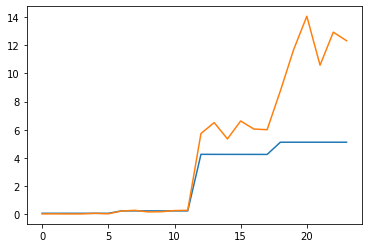

In [6]:
xast = np.vstack((ast,ast,ast,ast))
xear  =  np.vstack((ear,ear,ear,ear))
xt = (xast,xear)
flux = Model_neatm_Ref_jhx((1.5,120,0.5),xt,lamdai)
plt.plot(flux)
plt.plot(y)

## MCMC

In [7]:
#initial
eta_gs = 1.2
D_gs = 150
eta_gss = [0,10]
D_gss = [0,400]
wf_gs = 0.2
wf_gss = [0,0.5]

In [8]:
#MCMC Function
def log_likelihood(theta, x, y, yerr):
    eta,D,wf = theta
    model = Model_neatm_Ref_jhx(theta,x,lamdai)
    #model = eta*x[0]*100 + D
    #sigma2 = yerr**2 + model**2 * np.exp(2 * logf)
    residuals_rv = y-model
    return -0.5*(np.sum((residuals_rv/yerr)**2 + np.log(2.0*np.pi*(yerr)**2)))
def log_prior(theta):
    eta,D,wf = theta
    if eta_gss[0]< eta < eta_gss[1] and D_gss[0] < D < D_gss[1] and wf_gss[0] < wf < wf_gss[1] :
        return 0.0
    return -np.inf
    #return 0
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
     #   print('hi','-inf')
        return -np.inf
    yy=lp + log_likelihood(theta, x, y, yerr)
    #print('hi',yy)
    return yy


In [9]:
#initial para guesses
eta = eta_gs
D = D_gs
wf = wf_gs
theta = [eta, D,wf]

In [10]:
import emcee
#initialize sampler
ndim, nwalkers = len(theta), 10
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xt, y, y*0.01))
pos = [theta + 1e-6*np.random.randn(ndim) for i in range(nwalkers)]
#run mcmc
sampler.run_mcmc(pos, 2000, progress=True);

/home/astrohhq/learngit/newwisedata/testssh/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
100%|██████████| 2000/2000 [09:07<00:00,  3.65it/s]


In [11]:
frac = sampler.acceptance_fraction
#np.savetxt(f'./figmcmc/samples/frac.txt.{name}',frac)

In [12]:
samples = sampler.get_chain()
samples[:,:,0]

array([[1.20000051, 1.19999752, 1.2000001 , ..., 1.19999792, 1.1999989 ,
        1.20000147],
       [1.20000248, 1.19999752, 1.20000016, ..., 1.1999973 , 1.19999827,
        1.20000197],
       [1.20000185, 1.20000001, 1.20000016, ..., 1.19999536, 1.19999834,
        1.20000197],
       ...,
       [2.68774205, 2.69796107, 2.70564718, ..., 2.69661387, 2.71369307,
        2.69517588],
       [2.68573112, 2.69796107, 2.70564718, ..., 2.69661387, 2.71345068,
        2.69654711],
       [2.68573112, 2.69796107, 2.70481371, ..., 2.69658906, 2.71510548,
        2.69328492]])

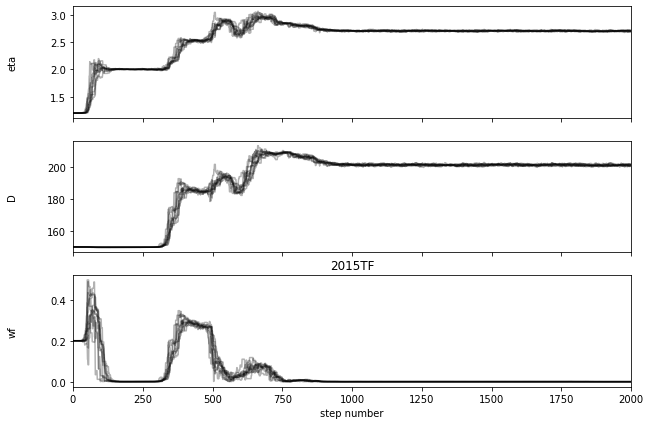

In [13]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["eta", "D", "wf"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    axes[-1].set_xlabel("step number");
    plt.title(name)
    #np.savetxt(f'./figmcmc/samples/samples_{i}.txt.{name}',samples[:,:,i])
#plt.savefig(f'./figmcmc/chain_{name}.png',transparent=True)

(930, 3)


Text(0.5, 1.0, '2015TF')

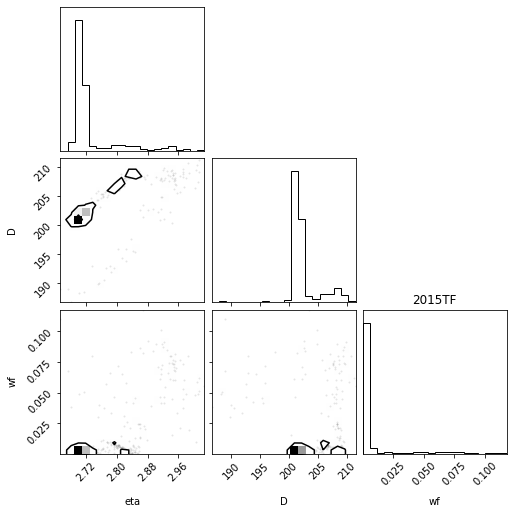

In [14]:
#--------------------------
flat_samples = sampler.get_chain(discard=600, thin=15, flat=True)
print(flat_samples.shape)
import corner
fig = corner.corner(
flat_samples, labels=labels, truths=[eta_gs, D_gs,wf_gs]
);
plt.title(name)
#plt.savefig(f'./figmcmc/coner_{name}.png',transparent=True)

In [15]:
np.savetxt(f'./figmcmc/samples/flatsam.txt.{name}',flat_samples)

In [16]:
from IPython.display import display, Math
fitans = []
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    fitans.append([mcmc[1],q[0],q[1]])
    display(Math(txt))
print(Math(txt))
D_low,D_fit,D_high = np.percentile(flat_samples[:, 1], [16, 50, 84])
pv = (1329*pow(10,-Hv/5)/(D_fit*0.001))**2
print('eta_gs = ',eta_gs,'D_gs= ',D_gs,'pv=',pv)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>
eta_gs =  1.2 D_gs=  150 pv= 0.05734098001975141


/home/astrohhq/learngit/newwisedata/testssh/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


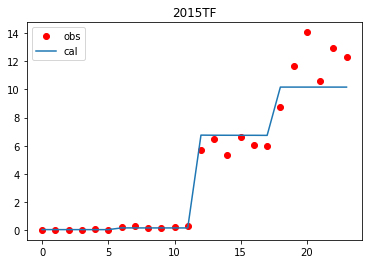

In [17]:
eta_low,eta_fit,eta_high = np.percentile(flat_samples[:, 0], [16, 50, 84])
D_low,D_fit,D_high = np.percentile(flat_samples[:, 1], [16, 50, 84])
wf_low,wf_fit,wf_high = np.percentile(flat_samples[:, 2], [16, 50, 84])
fitans.append([0,pv,0])
fitans.append([eta_fit,D_fit,wf_fit])
plt.plot(y,'ro',label='obs')
#plt.errorbar(y,y*0.1,fmt=".k", capsize=1.0)
test = [eta_fit, D_fit, wf_fit]
plt.plot(Model_neatm_Ref_jhx(test,xt,lamdai),label='cal')
plt.legend()
np.savetxt(f'./ansfit/fit.txt.{name}',fitans)
plt.title(name)
plt.savefig(f'./figflux/4b_{name}.png',transparent=True)

In [18]:
def loss(obs,cal,err):
    l = len(obs)
    return sum(((obs-cal)/err)**2)/l
print('LossFunction = ',loss(y,Model_neatm_Ref_jhx(test,xt,lamdai),erry))


/home/astrohhq/learngit/newwisedata/testssh/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


LossFunction =  376.65602753244275


/home/astrohhq/learngit/newwisedata/testssh/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


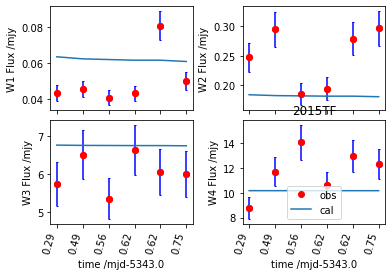

In [20]:
tjd = np.loadtxt(f'./datjd/mba.jd.{name}')
tmjd = tjd-2450000.5
roundmjd = np.around(tmjd,0)
rmjd = min(roundmjd)
#print(rmjd)
xtime = np.around(tmjd-rmjd,2)
yflux = Model_neatm_Ref_jhx(test,xt,lamdai)
plt.subplot(2,2,1)
plt.plot(y[:n4],'ro',label='obs')
plt.errorbar(range(0,n4,1),y[:n4], yerr=y[:n4]*0.1, fmt="o",ecolor='b',color='r', capsize=1.0)
plt.plot(yflux[:n4],label='cal')
plt.xticks(range(0,n4,1),xtime,rotation=75,ha='right')
#plt.xlabel('time /mjd')
plt.ylabel('W1 Flux /mjy')
ax1 = plt.gca()
ax1.axes.xaxis.set_ticklabels([])

plt.subplot(2,2,2)
plt.plot(y[n4:n4*2],'ro',label='obs')
plt.errorbar(range(0,n4,1),y[n4:n4*2], yerr=y[n4:n4*2]*0.1, fmt="o",ecolor='b',color='r', capsize=1.0)
plt.plot(yflux[n4:n4*2],label='cal')
plt.xticks(range(0,n4,1),xtime,rotation=75,ha='right')
#plt.xlabel('time /mjd')
plt.ylabel('W2 Flux /mjy')
ax2 = plt.gca()
ax2.axes.xaxis.set_ticklabels([])

plt.subplot(2,2,3)
plt.plot(y[n4*2:n4*3],'ro',label='obs')
plt.errorbar(range(0,n4,1),y[n4*2:n4*3], yerr=y[n4*2:n4*3]*0.1, fmt="o",ecolor='b',color='r', capsize=1.0)
plt.plot(yflux[n4*2:n4*3],label='cal')
plt.xticks(range(0,n4,1),xtime,rotation=75,ha='right')
plt.xlabel(f'time /mjd-{rmjd}')
plt.ylabel('W3 Flux /mjy')

plt.subplot(2,2,4)
plt.plot(y[n4*3:],'ro',label='obs')
plt.errorbar(range(0,n4,1),y[n4*3:], yerr=y[n4*3:]*0.1, fmt="o",ecolor='b',color='r', capsize=1.0)
plt.plot(yflux[n4*3:],label='cal')
plt.xticks(range(0,n4,1),xtime,rotation=75,ha='right')
plt.xlabel(f'time /mjd-{rmjd}')
plt.ylabel('W4 Flux /mjy')
plt.legend()
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.35,hspace=0.1)
#print(len(tjd),n4)
plt.title(name)
plt.savefig(f'./figflux/1b_{name}.png',transparent=True)